# **PROYECTO PARA FIDELIZACIÓN DE CLIENTES DEL BANCO SANTANDER**

## **RESUMEN**: el presente proyecto fue encargado por la Gerencia del Banco Santander con la intención de incrementar la fidelización de clientes en determinadas regiones con una caída en los ingresos financieros.
## En una etapa inicial, se ha solicitado al Banco que nos provea información respecto a la cartera de clientes de aquellos países con la baja de ingresos mencionada. Las características o variables de dicha cartera de encuenta detallada en el presente trabajo en la sección de composición del dataset.
## Se procedió a realizar un análisis explotario de los datos con la intención de obtener información relevante respecto a la composición de la cartera de clientes y ver si había relaciones líneales que pudieran observarse respecto al por qué de la decisión de algunos clientes de abandonar el banco. Del análisis realizado, se pudo observar que la tasa de abandono es superior en Alemania, pero que no había relación entre el género del cliente y su decisión de dejar el banco. Tampoco pudo observarse una relación lineal directa entre la tasa de abandono y la antigüedad de cada cliente, o entre la tasa de abandono y el saldo en la cuenta bancaria.
## No se observaron datos nulos o faltantes, ni datos outliers relevantes.
## En la etapa posterior se eligió un algoritmo de machine learning para entrenar al dataset, y lograr de esta forma, la predicción de abanono de clientes. Dada las características del problema a resolver y del dataset en general, se optó por un algortimo de "árbol de decisión".
## Se realizaron dos pruebas de entrenamiento, considerando en la primera de ellas llevar la profundidad del módelo al máximo, y en la segunda limitar dicha profundidad. Los resultados fueron expuestos en la sección respectiva.

## **OBJETIVO**: el presente trabajo tiene como objetivo predecir en base a distintas métricas, si el cliente del banco abandonará o no el mismo, para de esta forma dirigir políticas de fidelización, puntualmente orientadas a los clientes que posiblemente puedan abandonar el banco.


## **CONTEXTO COMERCIAL**: el Banco Santander le encargo al departamento de "Data Sciencie & Analytics" el análsis de una muestra reducida de su cartera de clientes. Para definir la muestra se ha optado por aquellos países en donde el banco tiene una fuerte presencia, pero que de acuerdo a los últimos informes recibidos de cada región, se puede observar una reducción en los ingresos financieros. La Gerencia quiere poder anticipar el abandono de clientes, para de esta forma dirigir a ellos políticas de fidelización (tales como promociones, descuentos, beneficios y productos adicionales), para de esta forma recomponer los ingresos regionales.

# **1 - ANÁLISIS EXPLOTARIO DE DATOS (EDA)**

# **Descripción del dataset**

---



RowNumber: número de filas del 1 al 10.000.

CustomerId: código de identificación único para cada cliente adignado por el banco.

Surname: apellido del cliente.

CreditScore: puntaje de crédito del cliente. Tiene un rango de 300 a 850.

Geography: país de residencia del cliente.

Gender: género del cliente.

Age: edad del cliente (years)

Tenure: cantidad de años que el cliente está en el banco.

Balance: saldo bancario del cliente. (Euros)

NumOfProducts: número de productos que el cliente tiene contratados con el banco.

HasCrCard: indica si el cliente tiene una tarjeta de crédito con el banco (0= N=, 1 = SI)

IsActiveMember: indica si el cliente es considerado miembro activo.

EstimatedSalary: sueldo anual estimado del cliente (Euros)

Exited: indica si el cliente ha dejado el banco (0= N=, 1 = SI)

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#elimino la columna "RowNumber" porque no me aporta información relevante.
df = df.drop ('RowNumber', axis = 1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
#utilizando el método info veo que no hay datos nulos a simple vista.
#vuelvo a revisar con "isna"

df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df["Geography"]= df["Geography"].astype("category")
df["Gender"]= df["Gender"].astype("category")
df.describe(include=['category'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# ***Hipótesis 1 = ¿Existe alguna relación entre la residencia del cliente y el abandono?***

In [9]:
df.value_counts("Geography", normalize = True) *100

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

In [10]:
df_abandono = df[df["Exited"] == 1]
df_abandono.value_counts("Geography", normalize = True) *100

Geography
Germany    39.960727
France     39.764359
Spain      20.274914
Name: proportion, dtype: float64

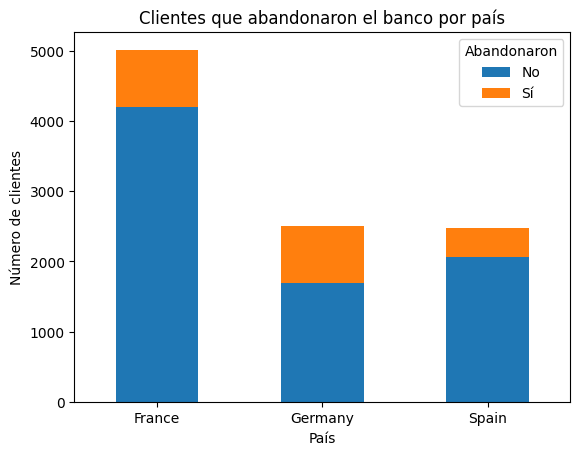

In [11]:
abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()
abandono_por_pais.plot(kind='bar', stacked=True)
plt.title('Clientes que abandonaron el banco por país')
plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.legend(title='Abandonaron', labels=['No', 'Sí'])
plt.xticks(rotation=0)

plt.show()

In [12]:
abandono_por_pais['Totales'] = abandono_por_pais[1] + abandono_por_pais[0]
abandono_por_pais.rename(columns = {0: "No abandonaron", 1:"Abandonaron"},inplace= True)
abandono_por_pais['Tasa de abandono'] = abandono_por_pais["Abandonaron"] / abandono_por_pais["Totales"]
abandono_por_pais

Exited,No abandonaron,Abandonaron,Totales,Tasa de abandono
Geography,,,,
France,4204,810,5014,0.161548
Germany,1695,814,2509,0.324432
Spain,2064,413,2477,0.166734


Análisis de la hipotesis: se puede observar que España es el país con menor cantidad de clientes con abandono, siendo Francia y Alemania los que tienen mayor cantidad de clientes que dejaron el banco.
Pero hay que tener presente que entre estos dos últimos, la cantidad de clientes totales en Francia duplican a la cantidad de clientes en Alemania, por lo que decir que la tasa de abandono es similar en ambos países sería incorrecto, ya que Alemania tiene la mitad de clientes que Francia e igual cantidad de abandono.
Por lo tanto la tasa alemana de abandono respecto a los clientes totales es mayor que la de los otros dos países.

# ***Hipótesis 2 = ¿Existe alguna relación entre el género del cliente y el abandono?***

In [13]:
df.value_counts("Gender", normalize = True) *100

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

In [14]:
df_abandono = df[df["Exited"] == 1]
df_abandono.value_counts("Gender", normalize = True) *100


Gender
Female    55.915562
Male      44.084438
Name: proportion, dtype: float64

In [15]:
abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()
abandono_por_genero

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


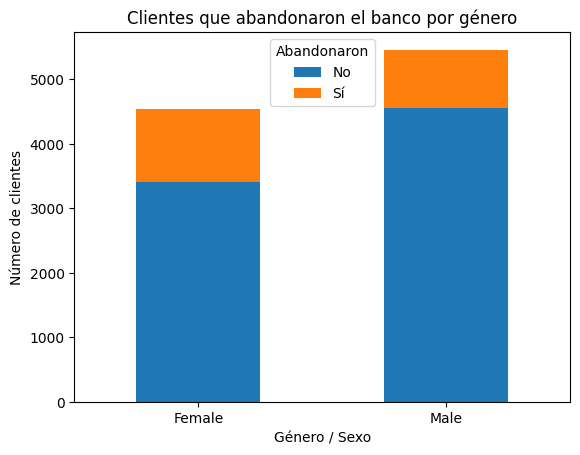

In [16]:
abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()
abandono_por_genero.plot(kind='bar', stacked=True)
plt.title('Clientes que abandonaron el banco por género')
plt.xlabel('Género / Sexo')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(title='Abandonaron', labels=['No', 'Sí'], loc='upper center')
plt.show()

In [17]:
abandono_por_genero['Totales'] = abandono_por_genero[1] + abandono_por_genero[0]
abandono_por_genero.rename(columns = {0: "No abandonaron", 1:"Abandonaron"},inplace= True)
abandono_por_genero['Tasa de abandono'] = abandono_por_genero["Abandonaron"] / abandono_por_genero["Totales"]
abandono_por_genero

Exited,No abandonaron,Abandonaron,Totales,Tasa de abandono
Gender,,,,
Female,3404,1139,4543,0.250715
Male,4559,898,5457,0.164559


Análisis de la hipotesis: de los datos revisados, se puede ver que la distribución por género del dataset es bastante equilibrada, siendo que el 54,5% son hombres y el 45,5% mujeres. Ahora bien, filtrando solamente por quienes abandonaron el banco, el 55,9 son mujeres y el 44,1 restante son hombres (se invierte la tendencia del dataset completo).

Tanto en el gráfico como en la última tabla, se puede observar que la tasa de abandono de mujeres es mayor a la de los hombres, entiendendose dicha tasa como la proporción entre la cantidad de abandonos por género dividido los clientes totales por género.

# ***Hipótesis 3 = El crédit score es una variable relacionada directamente al salario estimado***

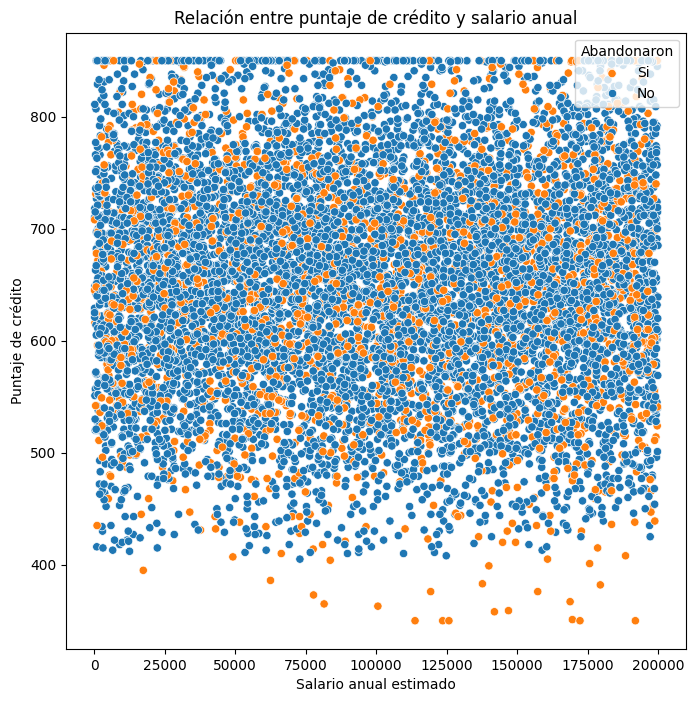

In [18]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="EstimatedSalary", y="CreditScore", hue="Exited", size=None)
plt.title('Relación entre puntaje de crédito y salario anual')
plt.xlabel("Salario anual estimado")
plt.ylabel('Puntaje de crédito')
plt.legend(title='Abandonaron', labels=['Si', 'No'], loc='upper right', )
plt.show()

Análisis de la hipotesis: se puede observar que no existe una relación lineal entre el salario anual estimado y el credit score del cliente. Se puede ver gráficamente que salarios de rangos menores pueden tener el mismo puntaje que salarios en el extremo opuesto.

In [19]:
correlation = df['EstimatedSalary'].corr(df['CreditScore'])
print("Coeficiente de correlación:", correlation)

Coeficiente de correlación: -0.0013842928679845155


# ***Hipótesis 4 = Existe relación entre la antiguedad del cliente y el abandono?***

In [20]:
print(df['Tenure'].describe())

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


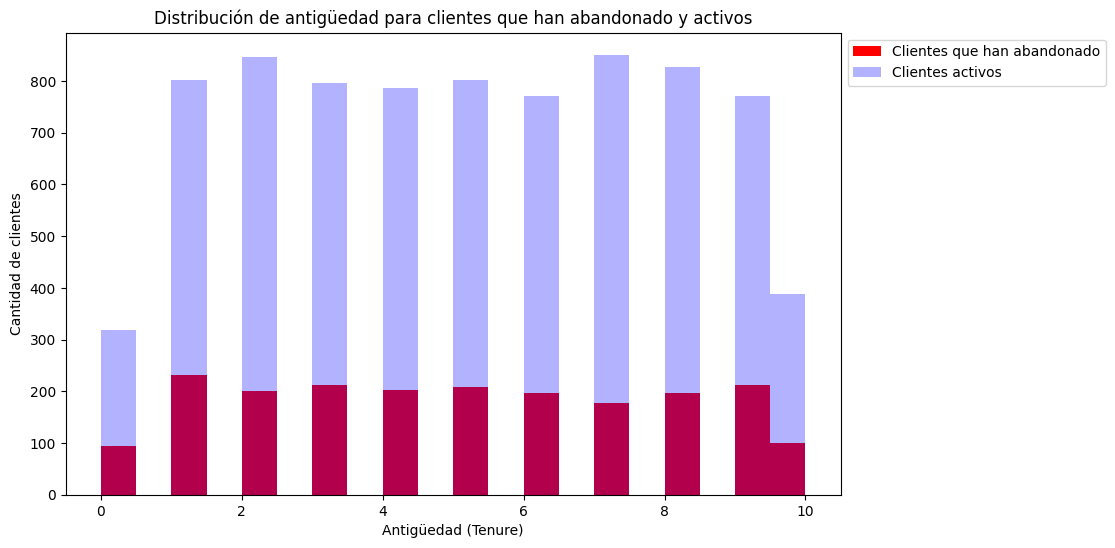

In [21]:
clientes_abandono = df[df['Exited'] == 1]
clientes_permanecieron = df[df['Exited'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(clientes_abandono['Tenure'], bins=20, alpha=1, color='red', label='Clientes que han abandonado')
plt.hist(clientes_permanecieron['Tenure'], bins=20, alpha=0.3, color='blue', label='Clientes activos')
plt.xlabel('Antigüedad (Tenure)')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de antigüedad para clientes que han abandonado y activos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
mean_tenure_abandono = clientes_abandono['Tenure'].mean()
mean_tenure_permanecieron = clientes_permanecieron['Tenure'].mean()
print("Antigüedad media para clientes que han abandonado:", mean_tenure_abandono)
print("Antigüedad media para clientes activos:", mean_tenure_permanecieron)

Antigüedad media para clientes que han abandonado: 4.932744231713304
Antigüedad media para clientes activos: 5.033278914981791


Análisis de la hipotesis: gráficamente se puede ver que no exixte una relación directa entre la antiguedad del cliente y el abandono del mismo. Se observa una distribución bastante pareja entre los clientes con antiguedad mayor a 1 año y menor a 9 años.

# ***Hipótesis 5 = Existe relación entre la antiguedad del cliente y el credit score?***

In [23]:
print(df[['Tenure', 'CreditScore']].describe())

             Tenure   CreditScore
count  10000.000000  10000.000000
mean       5.012800    650.528800
std        2.892174     96.653299
min        0.000000    350.000000
25%        3.000000    584.000000
50%        5.000000    652.000000
75%        7.000000    718.000000
max       10.000000    850.000000


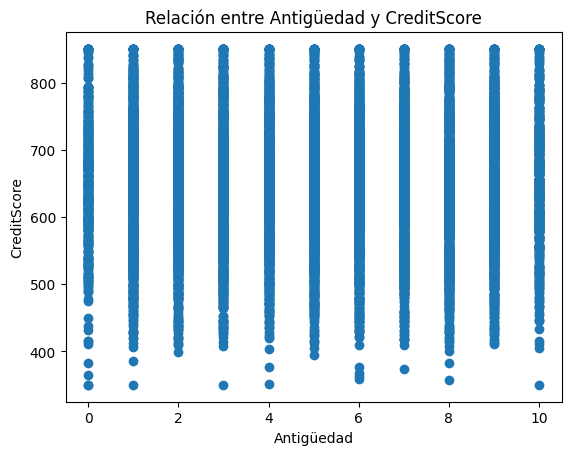

In [24]:
plt.scatter(df['Tenure'], df['CreditScore'])
plt.xlabel('Antigüedad')
plt.ylabel('CreditScore')
plt.title('Relación entre Antigüedad y CreditScore')
plt.show()

In [25]:
correlation = df['Tenure'].corr(df['CreditScore'])
print("Coeficiente de correlación:", correlation)

Coeficiente de correlación: 0.0008419418186459871


Análisis de la hipotesis: viendo lo que muestra el cuadro y luego también completandolo calculando el coeficiente de correlación (el cual no es cercano a 1 ni -1) se puede concluir que no existe una relación directa entre la antiguedad del cliente y el crédit score.

# ***Hipótesis 6 = Impacto del saldo bancario en la retención de clientes***

In [26]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

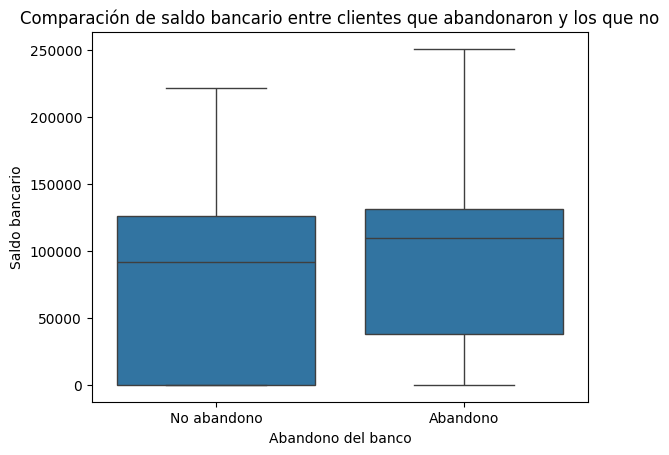

In [27]:
sns.boxplot(x='Exited', y='Balance', data=df)
labels = ['No abandono', 'Abandono']
plt.xticks(ticks=[0, 1], labels=labels)
plt.xlabel('Abandono del banco')
plt.ylabel('Saldo bancario')
plt.title('Comparación de saldo bancario entre clientes que abandonaron y los que no')
plt.show()

In [28]:
coef_var = df["Balance"].std() / df['Balance'].mean() *100
coef_var

81.58028334799735

La media no es representativa por ubicarse el coeficiente de variación por encima del 30%.

In [29]:
df_balance_abandono= df[df["Exited"] ==1]
df_balance_no_abandono= df[df["Exited"] ==0]

In [30]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [31]:
df_balance_abandono["Balance"].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

In [32]:
df_balance_no_abandono["Balance"].describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [33]:
df_comparando_balance = pd.DataFrame({"Clientes totales":df["Balance"].describe(),"Clientes_abandonaron":df_balance_abandono["Balance"].describe(),"Clientes_no_abandonaron":df_balance_no_abandono["Balance"].describe()})
df_comparando_balance.round(2)


,Clientes totales,Clientes_abandonaron,Clientes_no_abandonaron
count,10000.00,2037.00,7963.00
mean,76485.89,91108.54,72745.30
std,62397.41,58360.79,62848.04
min,0.00,0.00,0.00
25%,0.00,38340.02,0.00
50%,97198.54,109349.29,92072.68
75%,127644.24,131433.33,126410.28
max,250898.09,250898.09,221532.80


Análisis de la hipotesis: del relevamiento de los datos no se ve que el saldo de la cuenta bancaria tenga un impacto directo en si el cliente abandona o no el banco. Se puede apreciar eso tanto gráficamente como en la tabla con las principales estadísticas seteadas de forma comparativa.
A lo sumo puede inferirse que aquellos clientes con saldos en su cuenta bancaria menores tienden a permanecer más en el banco.

# **2 - ENTRENAMIENTO DEL MÓDELO**

Dada las características del conjunto de datos (dataset), se ha optado por entrenar al módelo con un algoritmo de clasificación, ya que lo que se desea es poder predecir una variable objetivo (si el cliente abandona o no el banco).

Teniendo en cuenta el tamaño del dataset, la presencia de variables tanto categóricas cómo numéricas, y la facilidad que presenta al momento se interpretar los datos, se optó por un módelo basado en el "árbol de decisión".

Se contempla que este tipo de módelos tiende al overfitting, por lo cual, se le prestará mucha atención a la profundidad de las ramas.

Otros modelos de clasificación como KNN y regresión logística fueron descartados en base al EDA realizado previamente. En el primer caso (KNN), para un dataset tan grande puede insumir demasiados recursos de procesamiento de datos. En el segundo caso (regresión logística), se descartó porque gracias al EDA realizado puede observarse que no hay una relación líneal directa entre las distintas variables y la variable objetivo.


Para el entrenamiento del módelo, se han elegido la mayor parte de las variables del dataset, prescindiendo de las que no arrojan información relevante, como ser el ID del cliente y su nombre y apellido, ya que se entiende del análisis realizado que no tienen ningún tipo de incidencia en si el cliente abandona o no el banco.


# ***Algoritmo de clasificación: árbol de decisión***

In [34]:
pip install mlxtend --upgrade --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

In [36]:
df['Geography'].replace({'Spain':0, 'France':1, 'Germany':2}, inplace=True) #convierto la variable geography en un dato numérico para que el módelo lo considere en el entrenamiento
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True) #convierto la variable gender en un dato numérico para que el módelo lo considere en el entrenamiento
X = df.drop(columns=['CustomerId', 'Surname', 'Exited'])  #descarto variables para entrenar. La variable "Exited" la descarto por ser justamente la variable objetivo.
y = df['Exited']

#Divido los datos del dataset para entrenar (elegí proporción 70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelo = DecisionTreeClassifier()  #creo el módelo
modelo.fit(X_train, y_train) #entreno el módelo

preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [37]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [38]:
y.value_counts(normalize=True).round(5)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [39]:
cm = confusion_matrix(y_train, preds_train)  #matriz de confusión con los datos de entrenamiento, como control.
cm
#La matriz de confusión generada a partir de los datos de entrenamiento solo arroja verdaderos positivos y verdaderos negativos, ya que aún el módelo no fue puesto a prueba, solo entrenado.

array([[5547,    0],
       [   0, 1453]])

In [40]:
preds_train = modelo.predict(X_train)
f1_abandono = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_no_abandono = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_abandono, f1_no_abandono                #calculo las métricas con el dataset de entrenamiento

(1.0, 1.0)

In [41]:
cm = confusion_matrix(y_test, preds)       #matriz de confusión con los datos de testeo.
cm

array([[2111,  305],
       [ 276,  308]])

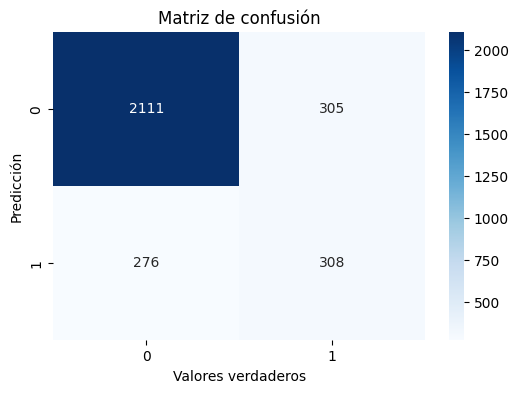

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Valores verdaderos")
plt.ylabel("Predicción")
plt.show()
#Clase 1: Abandono
#Clase 0: No abandono

In [43]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8063333333333333

El accuracy o exactitud está mostrando un 81% aproximadamente de predicciones correctas, pero con este dataset no es una metrica del todo confiable, dado el desbalanceo que tiene (80% de clientes que no abandonaron el banco vs un 20% que si)

In [44]:
precision_abandono = metrics.precision_score(y_test, preds, pos_label=1)
precision_no_abandono = metrics.precision_score(y_test, preds, pos_label=0)
precision_abandono, precision_no_abandono

(0.5024469820554649, 0.8843736908253037)

In [45]:
recall_abandono = metrics.recall_score(y_test, preds, pos_label=1)
recall_no_abandono = metrics.recall_score(y_test, preds, pos_label=0)
recall_abandono, recall_no_abandono

(0.5273972602739726, 0.8737582781456954)

Para el caso de las métricas de precisión y sensibilidad (recall) se puede observar que el desbalanceo que tiene el dataset afecta a los indicados. Al tener el dataset mayoría de casos con clientes que no abandonaron el banco, tanto la precision como el recall del grupo de "no abandono" es mucho más alto que los mismos indices para el grupo de "abandono".

In [46]:
f1_abandono = metrics.f1_score(y_test, preds, pos_label=1)
f1_no_abandono = metrics.f1_score(y_test, preds, pos_label=0)
f1_abandono, f1_no_abandono

(0.5146198830409356, 0.8790339371226317)

In [47]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [48]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.50      0.53      0.51       584

    accuracy                           0.81      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.81      0.81      0.81      3000



En base al entrenamiento y los datos obtenidos a través de las métricas, puede observarse un overfitting (sobreajuste) del módelo, es decir, está procesando "demasiado bien" los datos de entrenamiento, pero esto genera una rigidez en el módelo al ingresar datos nuevos.

Una posible causa del overfitting puede ser la profundidad de las ramas del árbol. En el ejemplo en cuestión no estamos determinando un máximo de ramas, por lo cual el módelo está profundizando demasiado el análisis.

Por tal motivo, a continuación se va a probar reduciendo la profundidad, para de esta forma simplificar al módelo y permitiendo una mayor generalización en la lectura de los datos.

In [49]:
df['Geography'].replace({'Spain':0, 'France':1, 'Germany':2}, inplace=True)
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
X = df.drop(columns=['CustomerId', 'Surname', 'Exited'])
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


modelo = DecisionTreeClassifier(max_depth=6)  #limito la profundidad
modelo.fit(X_train, y_train)

preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [50]:
preds_train = modelo.predict(X_train)
f1_abandono = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_no_abandono = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_abandono, f1_no_abandono

#calculo las métricas con el dataset de entrenamiento, y en este caso, a diferencia de lo anterior, el f1.score se ve notablemente reducido (sobretodo para el abandono),
#como consecuencia de entrenar a los datos con una menos profundidad en el árbol

(0.5952177625960717, 0.9186824498198661)

In [52]:
cm = confusion_matrix(y_test, preds)
cm

array([[2332,   84],
       [ 319,  265]])

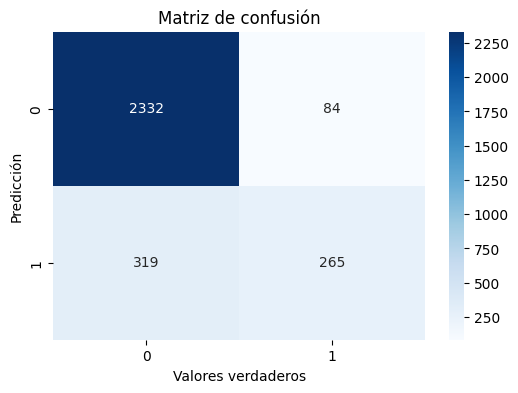

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Valores verdaderos")
plt.ylabel("Predicción")
plt.show()
#Clase 1: Abandono
#Clase 0: No abandono

In [54]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8656666666666667

In [55]:
precision_abandono = metrics.precision_score(y_test, preds, pos_label=1)
precision_no_abandono = metrics.precision_score(y_test, preds, pos_label=0)
precision_abandono, precision_no_abandono

(0.7593123209169055, 0.8796680497925311)

In [56]:
recall_abandono = metrics.recall_score(y_test, preds, pos_label=1)
recall_no_abandono = metrics.recall_score(y_test, preds, pos_label=0)
recall_abandono, recall_no_abandono

(0.4537671232876712, 0.9652317880794702)

In [57]:
f1_abandono = metrics.f1_score(y_test, preds, pos_label=1)
f1_no_abandono = metrics.f1_score(y_test, preds, pos_label=0)
f1_abandono, f1_no_abandono

(0.5680600214362272, 0.9204657588316558)

In [58]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.78      0.48      0.60      1453

    accuracy                           0.86      7000
   macro avg       0.83      0.72      0.76      7000
weighted avg       0.86      0.86      0.85      7000



In [59]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.76      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



CONCLUSIÓN: en base al trabajo realizado, puede observarse que el módelo mejoró notablemente al reducir la profundidad del árbol en el análisis, y de esta forma, reduciendo el overfitting que habíamos visto en el primer entrenamiento.
El análisis realizado debe contemplarse también considerando lo desbalanceado que estaba el dataset en cuanto a los clientes que abandonaron y no abandonaron el banco, por eso el algortimo tiene cierta debilidad al momento de realizar la predicción. De todas formas, es un primer paso importante para que el Banco pueda comenzar a dirigir políticas de retención y fidelización a aquellos clientes que tengan probabilidad por sus características de dejar el banco.
Se recomienda continuar incorporando datos al dataset y continuar con el entrenamiento del modelo con los nuevos datos, para que de esta forma continue con el aprendizaje en base a información mucha más diversificada.